In [3]:
%matplotlib notebook
import matplotlib as plt
import pandas as pd
from io import StringIO

In [22]:
strdata = """
0 1 0.000004053116
0 10 0.000005006790
0 100 0.000005006790
0 1000 0.000005006790
0 10000 0.000020980835
0 100000 0.000031948090
0 1000000 0.000223159790
0 10000000 0.002277851105
1 1 0.000004053116
1 10 0.000002145767
1 100 0.000003814697
1 1000 0.000005006790
1 10000 0.000014066696
1 100000 0.000028848648
1 1000000 0.000221014023
1 10000000 0.002259016037
2 1 0.000002861023
2 10 0.000001907349
2 100 0.000001907349
2 1000 0.000003099442
2 10000 0.000010967255
2 100000 0.000027894974
2 1000000 0.000221014023
2 10000000 0.002256155014
3 1 0.000003099442
3 10 0.000002861023
3 100 0.000001907349
3 1000 0.000004053116
3 10000 0.000010013580
3 100000 0.000027894974
3 1000000 0.000221014023
3 10000000 0.002257108688
4 1 0.000003099442
4 10 0.000001907349
4 100 0.000002145767
4 1000 0.000003814697
4 10000 0.000010967255
4 100000 0.000030994415
4 1000000 0.000241994858
4 10000000 0.002284049988
5 1 0.000003099442
5 10 0.000001907349
5 100 0.000003099442
5 1000 0.000002861023
5 10000 0.000010013580
5 100000 0.000030040741
5 1000000 0.000240802765
5 10000000 0.002285003662
6 1 0.000003099442
6 10 0.000001907349
6 100 0.000003099442
6 1000 0.000003099442
6 10000 0.000010967255
6 100000 0.000030040741
6 1000000 0.000241994858
6 10000000 0.002281904221
7 1 0.000002861023
7 10 0.000003099442
7 100 0.000001907349
7 1000 0.000002861023
7 10000 0.000010013580
7 100000 0.000030994415
7 1000000 0.000241994858
7 10000000 0.002284049988
8 1 0.000002861023
8 10 0.000003099442
8 100 0.000002145767
8 1000 0.000003814697
8 10000 0.000009059906
8 100000 0.000030040741
8 1000000 0.000241041183
8 10000000 0.002254009247
9 1 0.000001907349
9 10 0.000003099442
9 100 0.000002145767
9 1000 0.000002861023
9 10000 0.000010013580
9 100000 0.000030040741
9 1000000 0.000241994858
9 10000000 0.002283811569
10 1 0.000002145767
10 10 0.000001907349
10 100 0.000001907349
10 1000 0.000002861023
10 10000 0.000010013580
10 100000 0.000030040741
10 1000000 0.000241041183
10 10000000 0.002282142639
11 1 0.000003099442
11 10 0.000001907349
11 100 0.000001907349
11 1000 0.000004053116
11 10000 0.000010013580
11 100000 0.000029802322
11 1000000 0.000241041183
11 10000000 0.002284049988
12 1 0.000002861023
12 10 0.000003099442
12 100 0.000003099442
12 1000 0.000003099442
12 10000 0.000010013580
12 100000 0.000030040741
12 1000000 0.000241994858
12 10000000 0.002284049988
13 1 0.000002861023
13 10 0.000002145767
13 100 0.000002145767
13 1000 0.000003814697
13 10000 0.000010013580
13 100000 0.000030040741
13 1000000 0.000240802765
13 10000000 0.002257108688
14 1 0.000001907349
14 10 0.000002145767
14 100 0.000003099442
14 1000 0.000002861023
14 10000 0.000010013580
14 100000 0.000030994415
14 1000000 0.000241994858
14 10000000 0.002285003662
15 1 0.000002145767
15 10 0.000001907349
15 100 0.000001907349
15 1000 0.000003099442
15 10000 0.000009775162
15 100000 0.000030040741
15 1000000 0.000241041183
15 10000000 0.002285003662
16 1 0.000003099442
16 10 0.000001907349
16 100 0.000001907349
16 1000 0.000003099442
16 10000 0.000010013580
16 100000 0.000030040741
16 1000000 0.000241994858
16 10000000 0.002285003662
17 1 0.000003099442
17 10 0.000001907349
17 100 0.000001907349
17 1000 0.000003099442
17 10000 0.000010013580
17 100000 0.000030994415
17 1000000 0.000241994858
17 10000000 0.002285957336
18 1 0.000002145767
18 10 0.000002145767
18 100 0.000001907349
18 1000 0.000003099442
18 10000 0.000010013580
18 100000 0.000030040741
18 1000000 0.000241994858
18 10000000 0.002255916595
19 1 0.000001907349
19 10 0.000002145767
19 100 0.000002861023
19 1000 0.000003099442
19 10000 0.000009059906
19 100000 0.000030994415
19 1000000 0.000241994858
19 10000000 0.002282857895
20 1 0.000002861023
20 10 0.000002145767
20 100 0.000003099442
20 1000 0.000002861023
20 10000 0.000010967255
20 100000 0.000030994415
20 1000000 0.000241041183
20 10000000 0.002285003662
21 1 0.000003099442
21 10 0.000001907349
21 100 0.000001907349
21 1000 0.000003099442
21 10000 0.000009775162
21 100000 0.000030040741
21 1000000 0.000241041183
21 10000000 0.002284049988
22 1 0.000001907349
22 10 0.000003099442
22 100 0.000001907349
22 1000 0.000003099442
22 10000 0.000009775162
22 100000 0.000030040741
22 1000000 0.000241994858
22 10000000 0.002291202545
23 1 0.000001907349
23 10 0.000003099442
23 100 0.000002145767
23 1000 0.000002861023
23 10000 0.000010013580
23 100000 0.000030040741
23 1000000 0.000241994858
23 10000000 0.002255916595
24 1 0.000003099442
24 10 0.000002861023
24 100 0.000001907349
24 1000 0.000003099442
24 10000 0.000010013580
24 100000 0.000029802322
24 1000000 0.000241994858
24 10000000 0.002282857895
25 1 0.000002861023
25 10 0.000002145767
25 100 0.000003099442
25 1000 0.000002861023
25 10000 0.000010013580
25 100000 0.000030994415
25 1000000 0.000241994858
25 10000000 0.002285957336
26 1 0.000002861023
26 10 0.000002145767
26 100 0.000002145767
26 1000 0.000003099442
26 10000 0.000009059906
26 100000 0.000029802322
26 1000000 0.000241041183
26 10000000 0.002286195755
27 1 0.000001907349
27 10 0.000002145767
27 100 0.000003099442
27 1000 0.000002861023
27 10000 0.000009059906
27 100000 0.000030040741
27 1000000 0.000241994858
27 10000000 0.002284049988
28 1 0.000002861023
28 10 0.000002145767
28 100 0.000002145767
28 1000 0.000002861023
28 10000 0.000010013580
28 100000 0.000030994415
28 1000000 0.000241994858
28 10000000 0.002255201340
29 1 0.000001907349
29 10 0.000001907349
29 100 0.000002145767
29 1000 0.000003099442
29 10000 0.000010013580
29 100000 0.000030994415
29 1000000 0.000241994858
29 10000000 0.002284049988
"""

In [23]:
df = pd.read_csv(StringIO(strdata), sep=" ", names=["try", "len", "time"])

In [24]:
df['throughput']=(2 * df['len']/df['time']) / 1000000 # MB/s

<IPython.core.display.Javascript object>


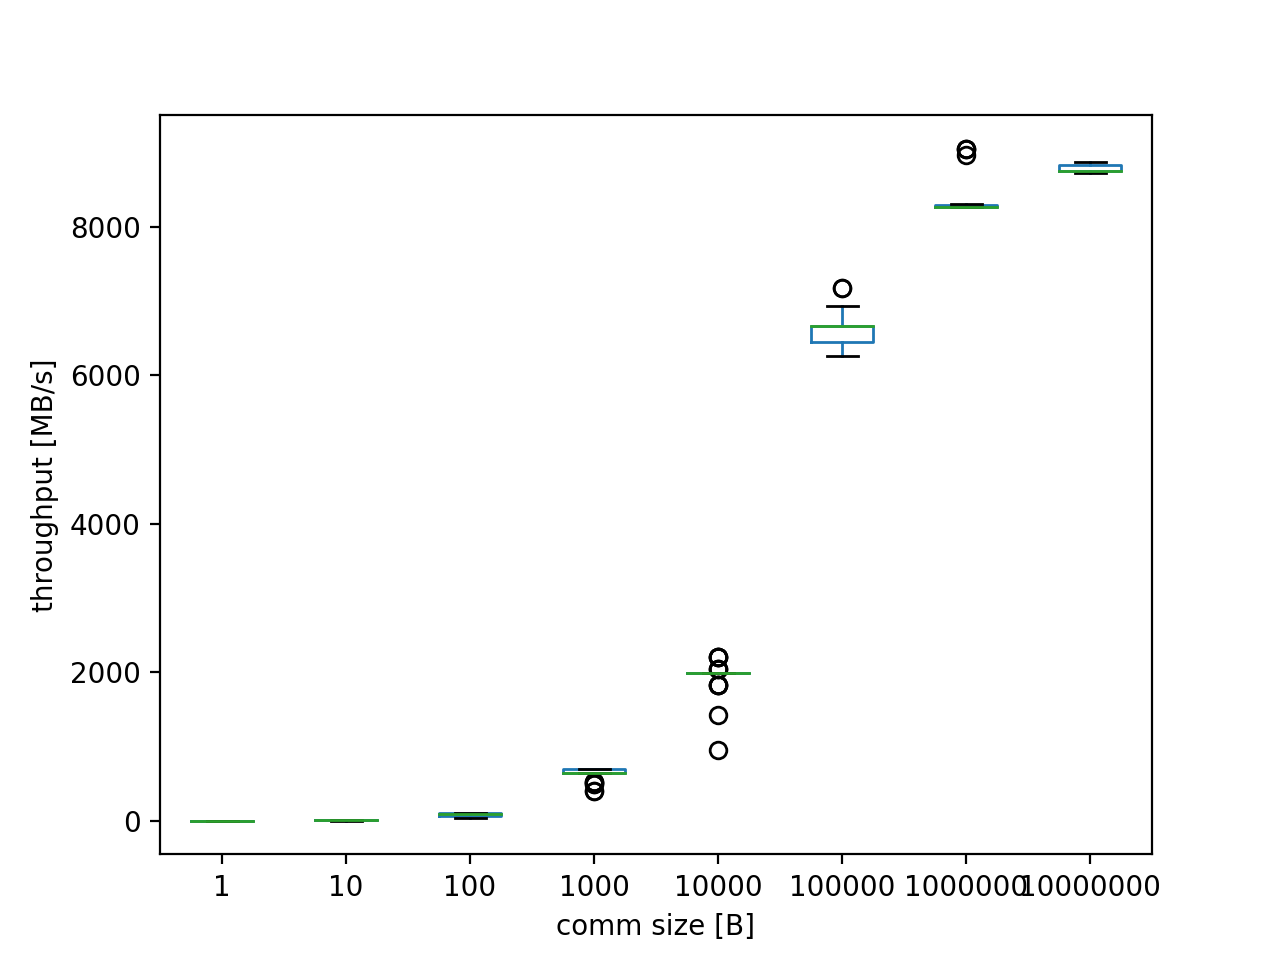

Text(0,0.5,'throughput [MB/s]')

In [25]:
bw_df = df[['try', 'len', 'throughput']].pivot(index='try', columns='len', values='throughput')
ax = bw_df.plot(kind='box')
ax.set_xlabel("comm size [B]")
ax.set_ylabel("throughput [MB/s]")
